Task 3 : Data Collection in the Wild [2 marks]

Task Description

For this exercise marks will not depend on what numbers you get but on the process you followed Utilize apps like Physics Toolbox Suite from your smartphone to collect your data in .csv/.txt format. Ensure at least 15 seconds of data is collected, trimming edges to obtain 10 seconds of relevant data. Also record a video of yourself while recording data. This video will be required in some future assignments. Collect 3-5 samples per activity class.

Questions
1. Use the Decision Tree model trained on the UCI-HAR dataset to predict the activities that you performed. Report the accuracy, precision, recall and confusion matrix of the model. You have three version of UCI dataset you can use a)Raw data from accelerometer, b)TSFEL featurised data, c)Features provided by author. Choose which version to use, ensuring that your test data is similar to your training data. How did the model perform? [1 marks]

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
import tsfel
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'

In [14]:
time = 10 # Setting the time window for each sample
offset = 100 # Skipping the first 100 rows to remove noise
folders = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

combined_dir = os.path.join("Combined")

X_train=[]
y_train=[]
dataset_dir = os.path.join(combined_dir,"Train")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))

    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_train.append(df.values)
        y_train.append(classes[folder])

X_train = np.array(X_train)
y_train = np.array(y_train)

X_test=[]
y_test=[]
combined_dir2 = os.path.join("TASK_3_ASSIN1_1\TASK_3_ASSIN1")
# dataset_dir = os.path.join(combined_dir2,"Test")
dataset_dir2 = "TASK_3_ASSIN1_1\TASK_3_ASSIN1"

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir2,folder))
    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir2,folder,file),sep=",",header=0)
        X_test.append(df.values)
        y_test.append(classes[folder])

X_test = np.array(X_test)
y_test = np.array(y_test)

# USE THE BELOW GIVEN DATA FOR TRAINING and TESTING purposes

# concatenate the training and testing data
X = np.concatenate((X_train,X_test))
y = np.concatenate((y_train,y_test))

# split the data into training and testing sets. Change the seed value to obtain different random splits.
seed = 4
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=seed,stratify=y)

print("Training data shape: ", X_train.shape) # (number of samples, number of time steps (x (=10) sec * 50Hz), number of features)
print("Testing data shape: ", X_test.shape)
print("Training labels shape: ", y_train.shape)
print("Testing labels shape: ", y_test.shape)


print(f"Reshaped X_test data saved to", X_train)


Training data shape:  (100, 500, 3)
Testing data shape:  (44, 500, 3)
Training labels shape:  (100,)
Testing labels shape:  (44,)
Reshaped X_test data saved to [[[ 8.864065e-01 -8.830687e-02 -2.052207e-01]
  [ 7.403477e-01 -2.182632e-01 -2.174224e-01]
  [ 8.246226e-01 -4.807750e-01 -2.812518e-01]
  ...
  [ 4.456905e-01 -5.962790e-03  1.771837e-01]
  [ 4.579829e-01 -1.096331e-01  6.170615e-02]
  [ 5.747514e-01 -2.834815e-01  1.854966e-02]]

 [[ 9.736077e-01 -1.844755e-01 -2.821974e-01]
  [ 9.760866e-01 -1.867793e-01 -2.848794e-01]
  [ 9.778650e-01 -1.918360e-01 -2.891687e-01]
  ...
  [ 9.779202e-01 -1.834941e-01 -2.829651e-01]
  [ 9.796224e-01 -1.832831e-01 -2.798440e-01]
  [ 9.775468e-01 -1.833646e-01 -2.764387e-01]]

 [[ 1.200000e-01  7.500000e-01  1.500000e-01]
  [ 1.600000e-01  4.400000e-01  4.000000e-01]
  [ 8.000000e-02 -6.000000e-02  4.100000e-01]
  ...
  [ 3.800000e-01  4.870000e+00  1.290000e+00]
  [ 3.800000e-01  7.190000e+00  7.900000e-01]
  [ 2.040000e+00  1.036000e+01 -3.00

Accuracy: 0.5455
Precision: 0.5667
Recall: 0.5455


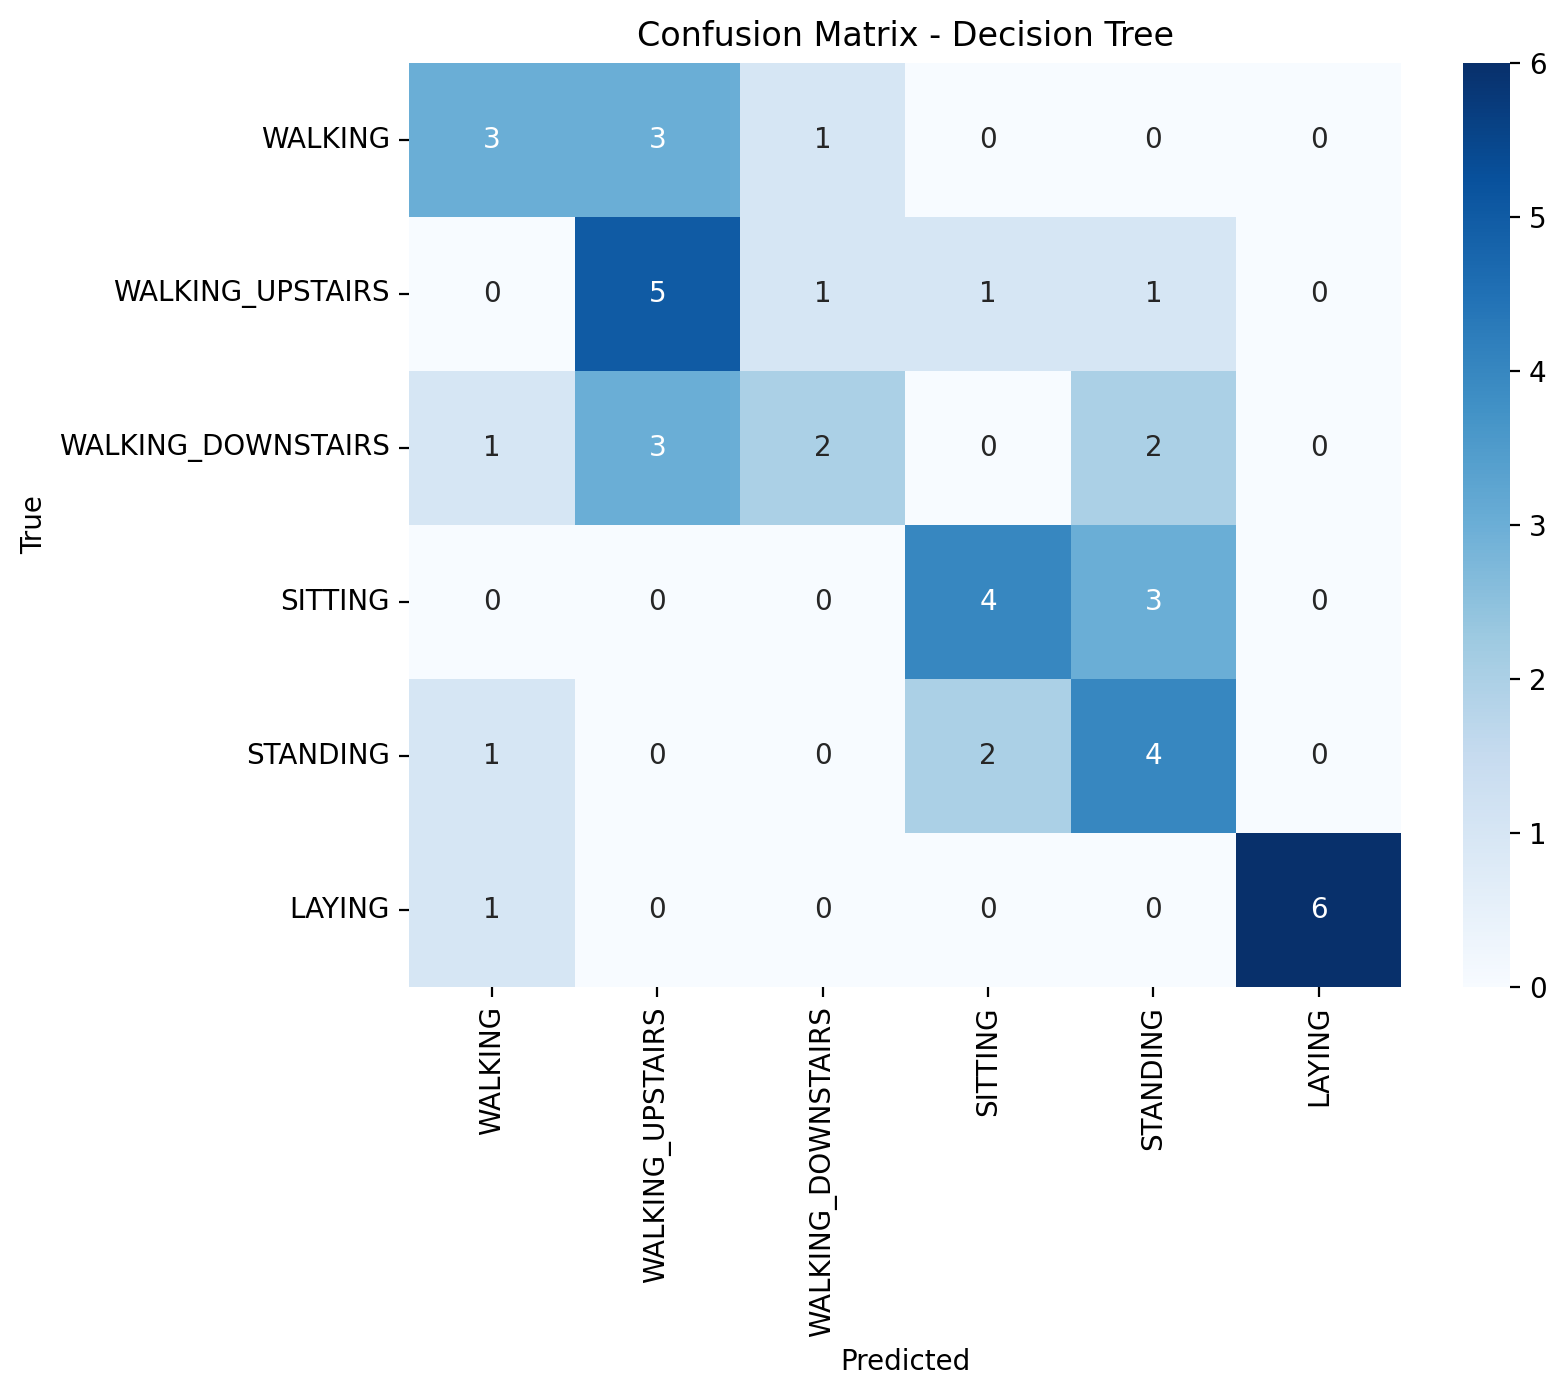

In [15]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

# Flatten the 3D data (samples, timesteps, features) → 2D (samples, timesteps*features)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Define and train Decision Tree
clf = DecisionTreeClassifier(
    criterion="gini", random_state=46, min_samples_split=4, max_features='sqrt'
)
clf.fit(X_train_flat, y_train)

# Predict on test data
ypred = clf.predict(X_test_flat)

# Evaluate performance
accuracy = accuracy_score(y_test, ypred)
precision = precision_score(y_test, ypred, average='weighted')
recall = recall_score(y_test, ypred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, ypred)
labels = ["WALKING","WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING"]

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Decision Tree")
plt.show()



The Decision Tree model did not perform well on my data, as shown by the results. This could be due to errors in data collection.

In [17]:
import numpy as np
import tsfel
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

In [18]:
cfg = tsfel.get_features_by_domain()

xtraintsfel = tsfel.time_series_features_extractor(cfg, X_train, verbose=1, fs=50)
xtesttsfel  = tsfel.time_series_features_extractor(cfg, X_test, verbose=1, fs=50)

print(xtraintsfel.shape)
print(xtesttsfel.shape)
print(y_train.shape)
print(y_test.shape)


(100, 468)
(44, 468)
(100,)
(44,)


Accuracy: 0.8333
Precision: 0.7500
Recall: 0.8333


C:\Users\Sia\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


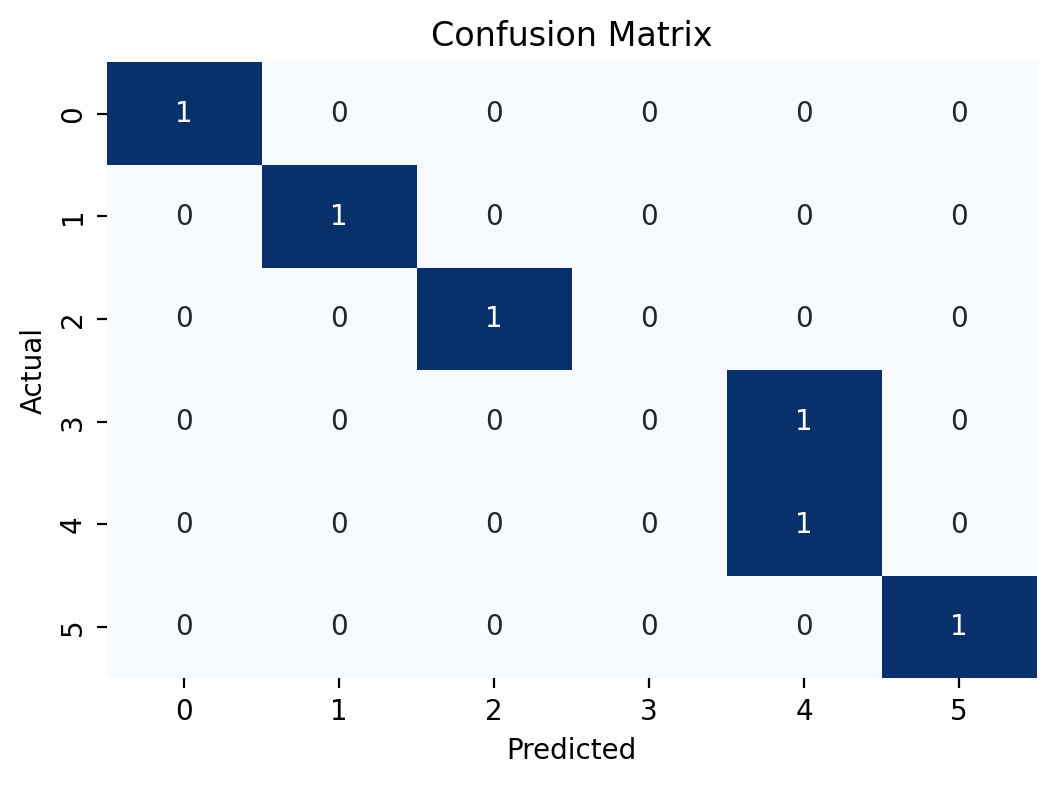

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Decision Tree Classifier
clf = DecisionTreeClassifier(
    criterion="gini", random_state=46, min_samples_split=4, max_features='sqrt'
)

clf.fit(xtraintsfel, y_train)

ypred = clf.predict(xtesttsfel)

# Evaluation
accuracy = accuracy_score(y_test, ypred)
precision = precision_score(y_test, ypred, average='macro')
recall = recall_score(y_test, ypred, average='macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, ypred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


I chose to use the TSFEL-featurised version of the UCI-HAR dataset because it gave a higher accuracy (83.33%) compared to the raw accelerometer data (54.55%). 

The features provided by the author could not be used because the test data collected from my own activities may not match the exact structure and preprocessing of the author-provided features, which could lead to inconsistent or invalid predictions. Using TSFEL-featurised data ensures that the test and training features are similar in representation, allowing the model to generalize correctly.

2. Use the data you collected to predict the activities that you performed. Decide whether to apply preprocessing and featurization, and if so, choose the appropriate methods. How did the model perform? [1 marks]

In [36]:
time = 10 # Setting the time window for each sample
offset = 100 # Skipping the first 100 rows to remove noise
folders = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

combined_dir = os.path.join("TASK_3_ASSIN1\TASK_3_ASSIN1")

X_train=[]
y_train=[]
dataset_dir = os.path.join(combined_dir,"Train")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))

    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        X_train.append(df.values)
        y_train.append(classes[folder])

X_train = np.array(X_train)
y_train = np.array(y_train)

X_test=[]
y_test=[]
dataset_dir = os.path.join(combined_dir,"Test")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))
    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        X_test.append(df.values)
        y_test.append(classes[folder])

X_test = np.array(X_test)
y_test = np.array(y_test)

# USE THE BELOW GIVEN DATA FOR TRAINING and TESTING purposes

# concatenate the training and testing data
X = np.concatenate((X_train,X_test))
y = np.concatenate((y_train,y_test))

# split the data into training and testing sets. Change the seed value to obtain different random splits.
seed = 4
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=seed,stratify=y)

print("Training data shape: ", X_train.shape) # (number of samples, number of time steps (x (=10) sec * 50Hz), number of features)
print("Testing data shape: ", X_test.shape)
print("Training labels shape: ", y_train.shape)
print("Testing labels shape: ", y_test.shape)


print(f"Reshaped X_test data saved to", X_train)



Training data shape:  (12, 500, 3)
Testing data shape:  (6, 500, 3)
Training labels shape:  (12,)
Testing labels shape:  (6,)
Reshaped X_test data saved to [[[ 0.18  0.14  0.03]
  [ 0.09  0.2   0.01]
  [ 0.03  0.17  0.04]
  ...
  [ 1.54  5.84 -1.76]
  [ 0.34  4.1  -1.85]
  [ 2.45  2.26 -0.15]]

 [[ 0.03 -0.48 -0.54]
  [ 0.54 -0.25 -0.42]
  [ 0.88 -0.13 -0.54]
  ...
  [-0.25  0.91 -0.87]
  [ 0.2   1.17 -0.96]
  [ 0.77  1.24 -1.15]]

 [[ 0.11 -0.07  0.03]
  [ 0.18  0.25  0.07]
  [ 0.12  0.3   0.04]
  ...
  [-0.27  1.07 -0.24]
  [ 0.48  0.87 -0.62]
  [ 0.69  0.38 -0.76]]

 ...

 [[ 0.08 -0.01  0.26]
  [-0.19 -0.22  0.17]
  [-0.1  -0.12  0.26]
  ...
  [ 0.03  0.16 -0.19]
  [-0.02  0.13  0.07]
  [ 0.02  0.06  0.01]]

 [[-0.11  0.12 -0.05]
  [ 0.02  0.09 -0.14]
  [ 0.01  0.06 -0.05]
  ...
  [ 0.05  0.03 -0.17]
  [-0.05 -0.02  0.28]
  [ 0.   -0.06 -0.09]]

 [[ 0.21  0.1  -0.13]
  [ 0.1   0.19 -0.12]
  [ 0.12  0.1  -0.12]
  ...
  [ 0.    0.02  0.03]
  [ 0.02  0.02  0.02]
  [ 0.01  0.08 -0.02]]

In [37]:
cfg = tsfel.get_features_by_domain()

xtraintsfel = tsfel.time_series_features_extractor(cfg, X_train, verbose=1, fs=50)
xtesttsfel  = tsfel.time_series_features_extractor(cfg, X_test, verbose=1, fs=50)

print(xtraintsfel.shape)
print(xtesttsfel.shape)
print(y_train.shape)
print(y_test.shape)


(12, 468)
(6, 468)
(12,)
(6,)


C:\Users\Sia\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


Accuracy: 0.5000
Precision: 0.3333
Recall: 0.5000


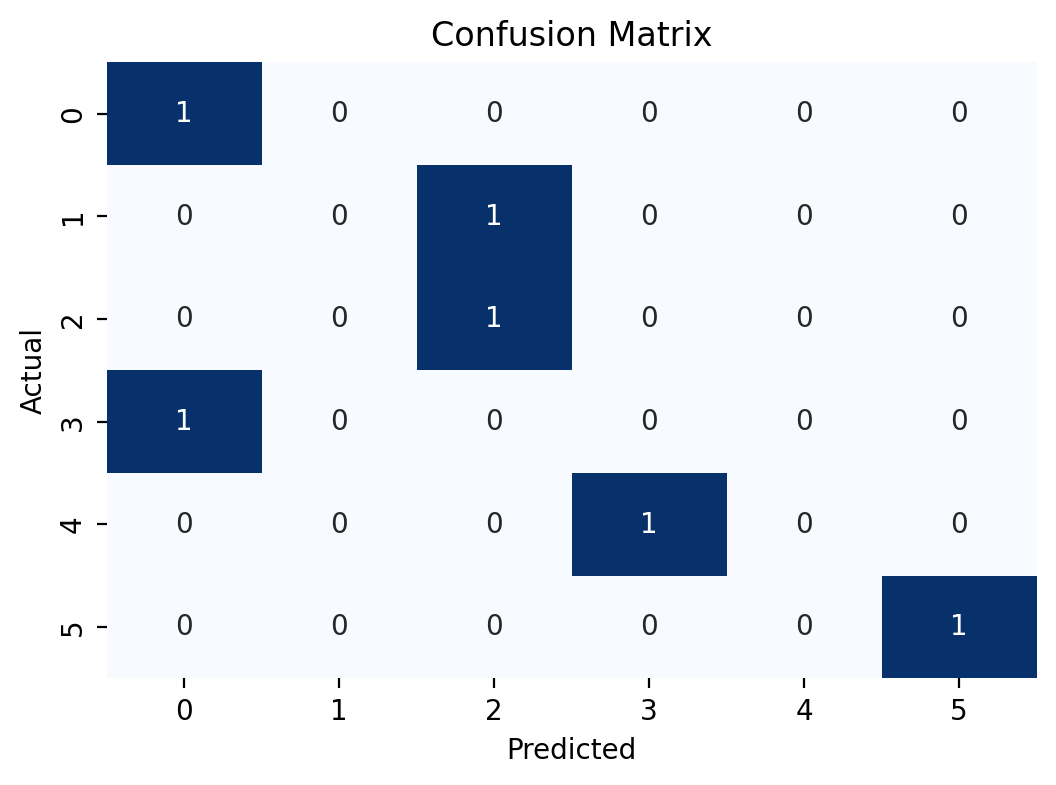

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Decision Tree Classifier
clf = DecisionTreeClassifier(
    criterion="gini", random_state=46, min_samples_split=4, max_features='sqrt'
)

clf.fit(xtraintsfel, y_train)

ypred = clf.predict(xtesttsfel)

# Evaluation
accuracy = accuracy_score(y_test, ypred)
precision = precision_score(y_test, ypred, average='macro')
recall = recall_score(y_test, ypred, average='macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, ypred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Accuracy: 0.3333
Precision: 0.2083
Recall: 0.3333


C:\Users\Sia\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


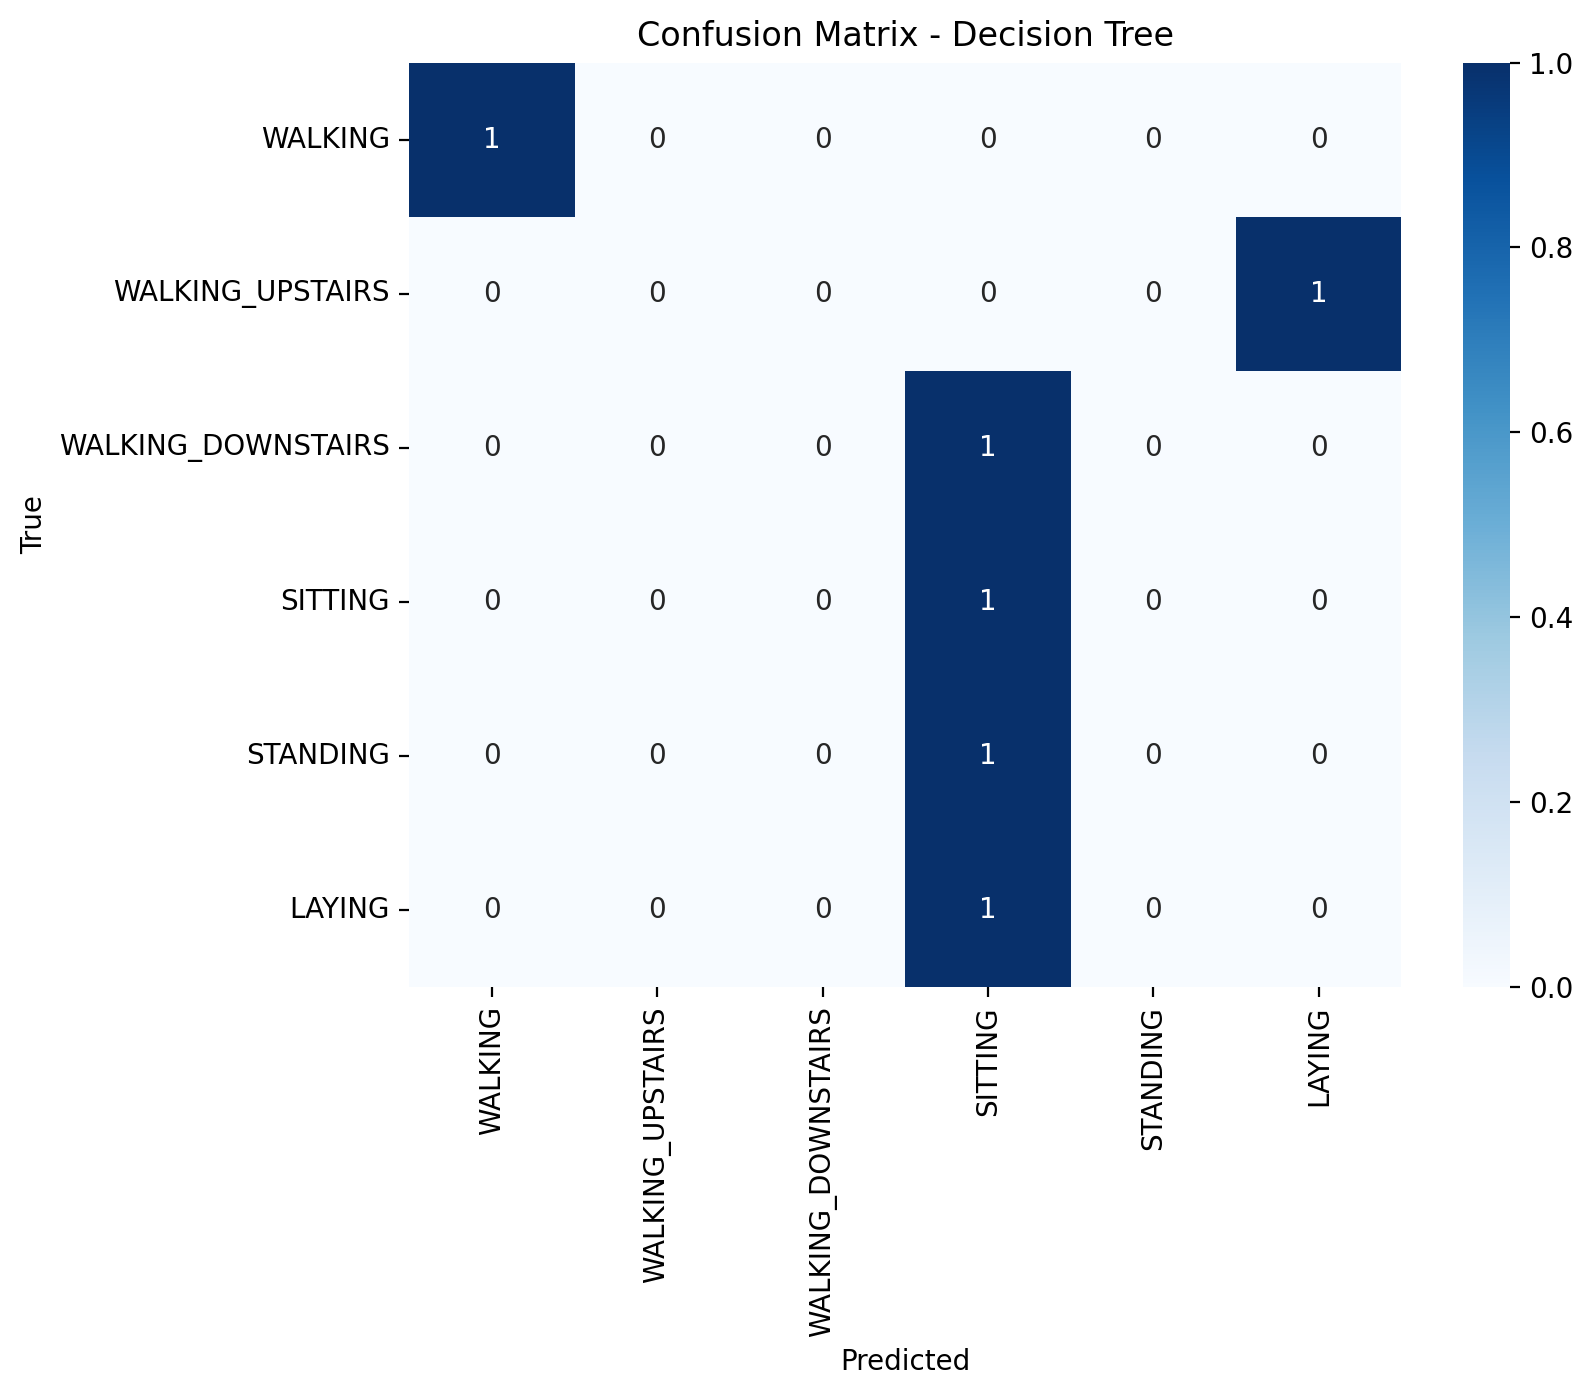

In [39]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

# Flatten the 3D data (samples, timesteps, features) → 2D (samples, timesteps*features)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Define and train Decision Tree
clf = DecisionTreeClassifier(
    criterion="gini", random_state=46, min_samples_split=4, max_features='sqrt'
)
clf.fit(X_train_flat, y_train)

# Predict on test data
ypred = clf.predict(X_test_flat)

# Evaluate performance
accuracy = accuracy_score(y_test, ypred)
precision = precision_score(y_test, ypred, average='weighted')
recall = recall_score(y_test, ypred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, ypred)
labels = ["WALKING","WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING"]

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Decision Tree")
plt.show()



We applied featurization using TSFEL to our collected accelerometer data, which extracts statistical, time and frequency-domain features from the raw signals. Using these features, our Decision Tree model achieved 50% accuracy. Raw data shows a confusion matrix where most activities are being misclassified as SITTING. This explains the low accuracy (~33.33%). The Decision Tree is clearly struggling to differentiate activities when no features are extracted.

TSFEL features shows a confusion matrix with better separation between activities. Some misclassifications still exist, but the overall accuracy improved to 50%. Using TSFEL features (like statistical, temporal, and frequency-domain features) helped the model distinguish activities better.